In [7]:
from numpy import *
from pandas import *
from matplotlib.pyplot import *
%matplotlib inline 
from sklearn.linear_model import LinearRegression
from seaborn import * 
import statsmodels.api as sm
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [8]:
data = read_csv("Salary_Data.csv")

In [9]:
data.head(5)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [11]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [12]:
x = data['YearsExperience']
y = data['Salary']

In [13]:
#Scatter  plot

Text(0, 0.5, 'salary')

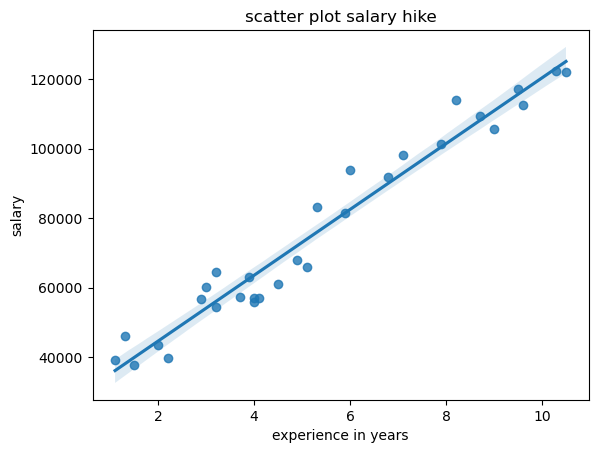

In [15]:
regplot(x = data['YearsExperience'],y = data['Salary'])
title("scatter plot salary hike")
xlabel("experience in years")
ylabel("salary")

In [16]:
#check for outliers in both columns

Text(0.5, 1.0, 'Years of Experience')

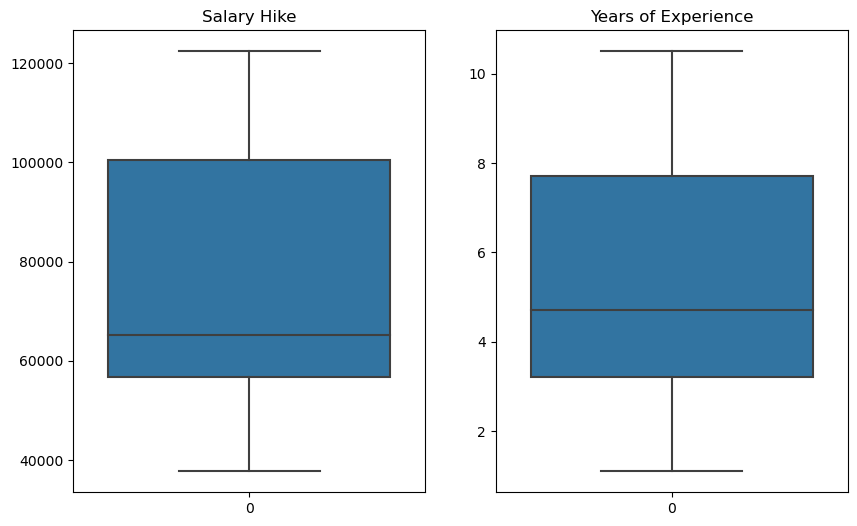

In [17]:
subplots(figsize = (10,6))
subplot(1,2,1)
boxplot(data['Salary'])
title('Salary Hike')
subplot(1,2,2)
boxplot(data['YearsExperience'])
title('Years of Experience')

In [18]:
#Lets check the co-relation

In [19]:
corr = corrcoef(x,y)

In [20]:
corr

array([[1.        , 0.97824162],
       [0.97824162, 1.        ]])

In [21]:
#they are highly corelated

<Axes: >

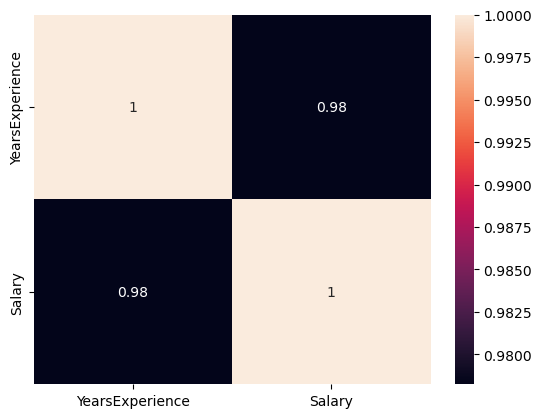

In [22]:
heatmap(data.corr(),annot=True)

In [23]:
#lets fit the model with no transformation

In [24]:
model1 = sm.OLS(y,x).fit()
pred1 = model1.predict(x)
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Salary   R-squared (uncentered):                   0.973
Model:                            OLS   Adj. R-squared (uncentered):              0.972
Method:                 Least Squares   F-statistic:                              1048.
Date:                Fri, 15 Dec 2023   Prob (F-statistic):                    2.56e-24
Time:                        18:49:39   Log-Likelihood:                         -327.28
No. Observations:                  30   AIC:                                      656.6
Df Residuals:                      29   BIC:                                      658.0
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
YearsExperience  1.325e+04    409.401     32.376      0.000    1.24e+04    1.41e+04
==============================================================================
Omnibus:                        0.610   Durbin-Watson:                   0.323
Prob(Omnibus):                  0.737   Jarque-Bera (JB):                0.671
Skew:                          -0.121   Prob(JB):                        0.715
Kurtosis:                       2.308   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
#Lets check RMSE value
print('RMSE:',sqrt(metrics.mean_squared_error(y, pred1)))

RMSE: 13231.208713249669


In [26]:
#We need less AIC and BIC score for best fit model and also we need r2 score very good.
#And also we need minimum RMSE

In [27]:
#Square Root transformation on data

In [28]:
model2 = sm.OLS(sqrt(y),sqrt(x)).fit()
pred2 = sqrt(model2.predict(x))
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Salary   R-squared (uncentered):                   0.988
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                              2338.
Date:                Fri, 15 Dec 2023   Prob (F-statistic):                    2.81e-29
Time:                        18:49:42   Log-Likelihood:                         -145.12
No. Observations:                  30   AIC:                                      292.2
Df Residuals:                      29   BIC:                                      293.6
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
YearsExperience   118.8652      2.458     48.352      0.000     113.837     123.893
==============================================================================
Omnibus:                        2.762   Durbin-Watson:                   0.231
Prob(Omnibus):                  0.251   Jarque-Bera (JB):                2.152
Skew:                           0.653   Prob(JB):                        0.341
Kurtosis:                       2.881   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
#Lets check RMSE value
print('RMSE:',sqrt(metrics.mean_squared_error(y, pred2)))

RMSE: 80615.90621929773


In [30]:
#Log transformation on Data

In [31]:
model3=sm.OLS(log(y),log(x)).fit()
pred3=log(model3.predict(x))
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Salary   R-squared (uncentered):                   0.878
Model:                            OLS   Adj. R-squared (uncentered):              0.874
Method:                 Least Squares   F-statistic:                              209.1
Date:                Fri, 15 Dec 2023   Prob (F-statistic):                    8.60e-15
Time:                        18:49:45   Log-Likelihood:                         -83.410
No. Observations:                  30   AIC:                                      168.8
Df Residuals:                      29   BIC:                                      170.2
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
YearsExperience     6.4461      0.446     14.461      0.000       5.534       7.358
==============================================================================
Omnibus:                        2.550   Durbin-Watson:                   0.026
Prob(Omnibus):                  0.279   Jarque-Bera (JB):                2.163
Skew:                           0.640   Prob(JB):                        0.339
Kurtosis:                       2.697   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
#Lets check RMSE value
print('RMSE:',sqrt(metrics.mean_squared_error(y, pred3)))

RMSE: 80637.53892632513


In [33]:
##Lets compare their RMSE values

In [34]:
RMSE_table =DataFrame({'model1':sqrt(metrics.mean_squared_error(y, pred1)),
             'model2':sqrt(metrics.mean_squared_error(y, pred2)),
             'model3':sqrt(metrics.mean_squared_error(y, pred3))},index =[1])

In [35]:
RMSE_table



,model1,model2,model3
1,13231.208713,80615.906219,80637.538926


In [36]:
#According to the above table and AIC and BIC values we conclude that the model1 is best .  

In [45]:
pred1 = DataFrame(pred1,columns=['predicted Salary'])

In [44]:
pred1

,predicted Salary
0,1.958789
1,2.125843
2,2.268944
3,2.556626
4,2.651936
5,2.928189
6,2.962091
7,3.026629
8,3.026629
9,3.171811


In [33]:
prediction = concat([data,pred1],axis=1)

In [34]:
prediction

,YearsExperience,Salary,predicted Salary
0,1.1,39343.0,14580.432300
1,1.3,46205.0,17231.419991
2,1.5,37731.0,19882.407682
3,2.0,43525.0,26509.876909
4,2.2,39891.0,29160.864600
5,2.9,56642.0,38439.321518
6,3.0,60150.0,39764.815363
7,3.2,54445.0,42415.803054
8,3.2,64445.0,42415.803054
9,3.7,57189.0,49043.272281


In [35]:
#According to the above code we conclude that the model1 is best among 3 models.